In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

#### Investigate scaling of gas costs with contract usage

We can define inline the manually recorded data from our Forge tests. There can be some variability in gas cost between tests, since the position of the winning user will determine the number of iterations with which the TWAB is calculated. To (slightly) improve our results, we can take the average of three runs for each test.

In [ ]:
data_opt1 = {
    
}

In [2]:
# Create a DataFrame from the provided data
data_opt2 = {
    'User Count': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Test 1': [235705, 425560, 614888, 809918, 994072, 1198923, 1399127, 1570344, 1763984, 1964524],
    'Test 2': [235705, 432891, 618338, 804744, 1008301, 1207978, 1395246, 1582418, 1768728, 1959349],
    'Test 3': [235705, 430735, 615320, 811212, 994072, 1183400, 1387484, 1593629, 1755792, 1958056]
}

df = pd.DataFrame(data_opt2)

# Compute the average gas cost across the three tests for each user count
df['Average Gas'] = df[['Test 1', 'Test 2', 'Test 3']].mean(axis=1)
df

,User Count,Test 1,Test 2,Test 3,Average Gas
0,10,235705,235705,235705,2.357050e+05
1,20,425560,432891,430735,4.297287e+05
2,30,614888,618338,615320,6.161820e+05
3,40,809918,804744,811212,8.086247e+05
4,50,994072,1008301,994072,9.988150e+05
5,60,1198923,1207978,1183400,1.196767e+06
6,70,1399127,1395246,1387484,1.393952e+06
7,80,1570344,1582418,1593629,1.582130e+06
8,90,1763984,1768728,1755792,1.762835e+06
9,100,1964524,1959349,1958056,1.960643e+06


In [3]:
# Refactor the DataFrame to have columns for different versions of the code
df2 = df[['User Count', 'Average Gas']].rename(columns={'Average Gas': 'Optimised'})

In [4]:
df2

,User Count,Optimised
0,10,2.357050e+05
1,20,4.297287e+05
2,30,6.161820e+05
3,40,8.086247e+05
4,50,9.988150e+05
5,60,1.196767e+06
6,70,1.393952e+06
7,80,1.582130e+06
8,90,1.762835e+06
9,100,1.960643e+06


In [5]:
def plot_gas_costs(dataframe, save=False):
    """
    Plot the gas costs for different versions of the code against the user count.
    
    Args:
    - dataframe: DataFrame with 'User Count' as one column and other columns representing different code versions.
    """
    # Set Seaborn style and palette
    sns.set_style("whitegrid", {'axes.edgecolor': '.8'})
    sns.set_palette("pastel")
    # Set up the plot
    plt.figure(figsize=(8, 4.5))
    
    # Loop through each version (column) in the dataframe except for 'User Count'
    for version in dataframe.columns[1:]:
        sns.lineplot(data=dataframe, x='User Count', y=version, marker='o', label=version, linewidth=2.5)
    
    # Add title, labels, and other aesthetics
    print('Average Gas Costs vs. User Count')
    plt.xlabel('User Count', fontsize=14)
    plt.ylabel('Average Gas Costs', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    sns.despine()   # Remove the top and right axis spines
    plt.legend()
    plt.tight_layout()
    if save:
        file_path = 'charts/raffleScaling.png'
        plt.savefig(file_path)
    
    plt.show()


Average Gas Costs vs. User Count


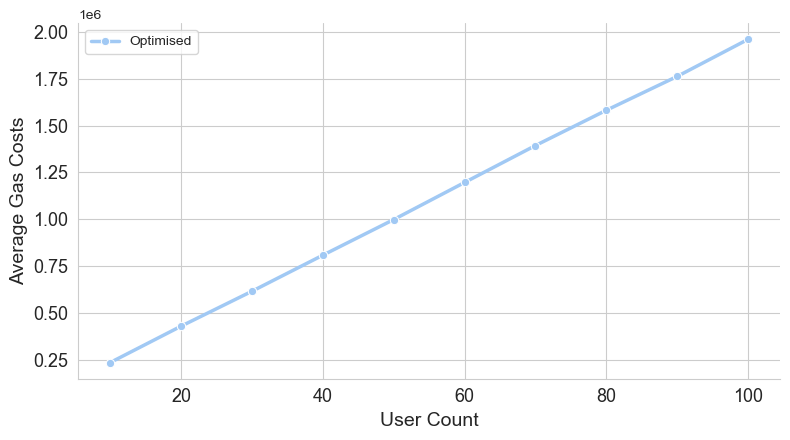

In [6]:
# Use the function to plot the current data
plot_gas_costs(df2, save=True)